# LSTM

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!pip install konlpy

     |████████████████████████████████| 19.4MB 2.8MB/s 
     |████████████████████████████████| 2.7MB 26.2MB/s 


In [3]:
from keras.callbacks import ModelCheckpoint
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.utils import np_utils
import pandas as pd
import numpy as np
import re
import konlpy

okt = konlpy.tag.Okt()

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/jpype/_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


In [4]:
# model Load
from keras.models import model_from_json 
json_file = open("/content/drive/My Drive/190918_프로젝트/model.json", "r")
loaded_model_json = json_file.read() 
json_file.close()
loaded_model = model_from_json(loaded_model_json)

In [5]:
# weight_load
loaded_model.load_weights("/content/drive/My Drive/190918_프로젝트/model.h5")
print("Loaded model from disk")



Loaded model from disk


In [6]:
loaded_model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
model = loaded_model

In [8]:
test_data = pd.read_csv("/content/drive/My Drive/190918_프로젝트/ratings_test.txt", sep="\t")
test_data.head()

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0


In [0]:
def text_preprocess(texts):
    res = []
    for text in texts:
        # 1. 특문제거
        text = re.sub("[`!@#$%^&*()_+=[\]\-~{};:,./?]", "", text)

        # 2. stem
        stems = okt.morphs(text, stem=True)

        # 3. 전처리된 문자열
        text_pre = " ".join([w for w in stems])
        
        res.append(text_pre)

    return res

In [0]:
test_data.dropna(inplace=True)

In [0]:
s = 9993
i = 9997
text = test_data['document'][s:i].values
label = test_data['label'][s:i].values

In [0]:
import pickle
# tokenizer_load 
with open('/content/drive/My Drive/190918_프로젝트/tokenizer.pickle', 'rb') as handle:
    t = pickle.load(handle)

In [0]:
origin = text

In [27]:
text = text_preprocess(text)
text

['잔잔하다 감성 과 싱그럽다 여름날 아련하다 사랑 의 추억 이 느껴지다 영화',
 '호기심 을 전혀 자극시키다 못 하다 늘어지다 구성 과 시 덥다 반전',
 '공항 셔틀버스 출입 로 는 cctv 다 있다 등록 제 인데 안 들키다 비현실적',
 '뜬금 없다 좀비 의 출현 개연 성 없다 스토리 좀비 영화 의 바이블 이라기 에는 개연 성 이 부족하다 느껴지다 평점 하다 개도 아깝다']

In [28]:
pd.DataFrame({'전처리 전':origin, '전처리 후':text})

,전처리 전,전처리 후
0,"잔잔함 감성과,싱그러운 여름날, 아련한 사랑의추억이 느껴지는 영화",잔잔하다 감성 과 싱그럽다 여름날 아련하다 사랑 의 추억 이 느껴지다 영화
1,호기심을 전혀 자극시키지 못하는 늘어지고 구성과 시덥잖은 반전,호기심 을 전혀 자극시키다 못 하다 늘어지다 구성 과 시 덥다 반전
2,"공항 셔틀버스 출입로는 cctv 다 있고 등록제인데, 안들킨게 비현실적",공항 셔틀버스 출입 로 는 cctv 다 있다 등록 제 인데 안 들키다 비현실적
3,뜬금없는 좀비의 출현... 개연성 없는 스토리... 좀비 영화의 바이블이라기에는 개...,뜬금 없다 좀비 의 출현 개연 성 없다 스토리 좀비 영화 의 바이블 이라기 에는 개...


In [29]:
pd.DataFrame({'전처리 후':text, '전처리 전':origin})

,전처리 후,전처리 전
0,잔잔하다 감성 과 싱그럽다 여름날 아련하다 사랑 의 추억 이 느껴지다 영화,"잔잔함 감성과,싱그러운 여름날, 아련한 사랑의추억이 느껴지는 영화"
1,호기심 을 전혀 자극시키다 못 하다 늘어지다 구성 과 시 덥다 반전,호기심을 전혀 자극시키지 못하는 늘어지고 구성과 시덥잖은 반전
2,공항 셔틀버스 출입 로 는 cctv 다 있다 등록 제 인데 안 들키다 비현실적,"공항 셔틀버스 출입로는 cctv 다 있고 등록제인데, 안들킨게 비현실적"
3,뜬금 없다 좀비 의 출현 개연 성 없다 스토리 좀비 영화 의 바이블 이라기 에는 개...,뜬금없는 좀비의 출현... 개연성 없는 스토리... 좀비 영화의 바이블이라기에는 개...


In [0]:
max_len=78
sequences = t.texts_to_sequences(text)

In [37]:
for sequence in sequences:
  print(sequence)

[322, 643, 35, 11318, 15779, 1417, 94, 5, 429, 1, 376, 2]
[2534, 8, 270, 7796, 48, 4, 2050, 554, 35, 361, 1068, 210]
[10476, 37921, 30, 11, 6790, 19, 16, 2633, 206, 140, 45, 9193, 1846]
[1373, 14, 726, 5, 3337, 533, 161, 14, 46, 726, 2, 5, 6719, 5412, 298, 533, 161, 1, 477, 376, 38, 4, 1218, 58]


In [0]:
# padding
x_train = pad_sequences(sequences, max_len)

In [33]:
print(x_train)

[[    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0   322   643    35 11318 15779  1417
     94     5   429     1   376     2]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0  2534     8   270  7796    48     4
   2050   554    35   361  1068   210]
 [    0     0     0     0     0   

In [38]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 78, 256)           12499456  
_________________________________________________________________
lstm_6 (LSTM)                (None, 256)               525312    
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 257       
Total params: 13,025,025
Trainable params: 13,025,025
Non-trainable params: 0
_________________________________________________________________


In [0]:
pred = model.predict_classes(x_train)

In [0]:
pred = pred.reshape(-1)

In [40]:
label

array([1, 0, 0, 0])

In [45]:
pd.DataFrame({'리뷰':text, 'label':label, '예측':pred})

,리뷰,label,예측
0,잔잔하다 감성 과 싱그럽다 여름날 아련하다 사랑 의 추억 이 느껴지다 영화,1,1
1,호기심 을 전혀 자극시키다 못 하다 늘어지다 구성 과 시 덥다 반전,0,0
2,공항 셔틀버스 출입 로 는 cctv 다 있다 등록 제 인데 안 들키다 비현실적,0,0
3,뜬금 없다 좀비 의 출현 개연 성 없다 스토리 좀비 영화 의 바이블 이라기 에는 개...,0,0


In [0]:
sum(pred.reshape(-1) == label) / len(label)

0.8468

In [0]:
test = input("댓글: ")

test = [test]

test = text_preprocess(test)

test = t.texts_to_sequences(test)

test = pad_sequences(test, max_len)

test = model.predict_classes(test)

test = test[0][0]

if test == 0 :
    print("부정")
else:
    print("긍정")

댓글: 최지만, 고교 선배 류현진 앞에서 16호 홈런 다저스 98승째
부정


# Bayes

## 분류기

In [0]:
train = pd.read_csv("/content/drive/My Drive/190918_프로젝트/ratings_train.txt", sep="\t")
test = pd.read_csv("/content/drive/My Drive/190918_프로젝트/ratings_test.txt", sep="\t")

In [0]:
class BayesianFilter:
  def __init__(self): # 객체 내에서 전역변수
    self.words = set() # set 자료구조 : 중복불가
    self.word_dict = {} 
    self.category_dict = {}
    self.likelihood_dict = {}

  def split(self, text):
    '''
    split 함수는 문장에서 단어들을 분리하고 구두점, 조사, 어미를 \n
    제거한다.
    =========================================
    parameter \n
    text : (str) 문자열
    '''
    okt = konlpy.tag.Okt()
    malist = okt.pos(text, norm=True, stem=True)
    # print(malist)

    ## 조사 어미 구두점 제거
    result = []
    
    for word in malist:
      if word[1] not in ["Josa", "Eomi", "Punctuation"]:
        result.append(word[0])
    
    return result

  def inc_word(self, word, category):
    '''
    inc_word 함수는 카테고리별로 단어가 등장한 횟수를 계산한다.\n
    word_dict = { \n
      '광고' : {'파격':1, '세일':1, ...}\n
      '중요' : {'일정':1, '확인':1, ...}\n
    }\n
    word_dict는 객체 내에서 global하기 때문에 자유롭게 fit 훈련이 가능하다.
    ==========================================
    parameter \n
    word : (str) 단어 1개
    category : (str) 그 문장의 카테고리
    
    '''
    if category not in self.word_dict: 
      self.word_dict[category] = {}
    
    # 초기화
    for cate in self.word_dict:
      if word not in self.word_dict[cate]:
        # 0이 되는걸 방지하기 위해 1로 초기화 
        self.word_dict[cate][word] = 1
    
    # +1
    self.word_dict[category][word] += 1 
    self.words.add(word) # 알아서 중복이 제거된다.
    
  def inc_category(self, category):
    if category not in self.category_dict:
      self.category_dict[category] = 0
    self.category_dict[category] += 1

  def arr_sum(self, arr):
    res = 0
    for v in arr:
      res += v
    
    return res

  def arr_mul(self, arr):
    res = 1
    for v in arr:
      res *= v

    return res

  def likelihood(self):
    '''
    우도표 제작
    '''
    # 카테고리별 전체 단어수 계산
    word_sum = {}
    for cate in self.word_dict.keys():
      word_counts = self.word_dict[cate].values()
      word_sum[cate] = self.arr_sum(word_counts)
    
    # 카테고리, 단어별 우도 계산
    for cate in self.word_dict.keys():
      self.likelihood_dict[cate] = {}

      for word in self.word_dict[cate]:
        self.likelihood_dict[cate][word] = self.word_dict[cate][word] / word_sum[cate]
    
    return self.likelihood_dict

  def predict(self, text):
    '''
    예측
    '''
    
    # P(label) = n(label) / n(labels)

    # n(labels)
    # 전체 카테고리 갯수
    sums = self.arr_sum(self.category_dict.values())
    
    # P(label)
    # 전체에 대한 각 카테고리 확률 계산
    p_cate = {}
    for cate in self.category_dict.keys():
      p_cate[cate] = self.category_dict[cate]/sums
    

    # 입력 문자열 해체
    words = self.split(text)   

    # 단어들이 나왔을때 각 카테고리에 들어갈 확률 계산
    pred_dict = {}

    for cate in self.word_dict:

      word_vals = []
      for word in words:
        # 학습되지 않은 단어라면 스킵
        if word not in self.likelihood_dict[cate]:
          continue

        val = self.likelihood_dict[cate][word]
        word_vals.append(val)
      
      # 우도 x p(라벨)
      hf = self.arr_mul(word_vals) * p_cate[cate]
      
      pred_dict[cate] = hf

      prediction = list(pred_dict.keys())[np.argmax(list(pred_dict.values()))]      
    
    return prediction, pred_dict

  def fit(self, text, category):
    '''
    fit 함수는 Bayesian Filter를 훈련시킨다.
    ========================================
    parameter \n
    text : (str) 문자열 \n
    category : (str) 중요인지 광고인지 label
    '''
    word_list = self.split(text)
    # print(word_list)

    for word in word_list:
      self.inc_word(word, category)    
    self.inc_category(category)


In [0]:
bf = BayesianFilter()

In [0]:
train = train.fillna('')

train_texts = train['document'].values
train_labels = train['label'].values

train_zip = zip(train_texts, train_labels)
total_train = len(train_texts)

# test
test = test.fillna('')

test_texts = test['document'].values
test_labels = test['label'].values

test_zip = zip(test_texts, test_labels)
total_test = len(test_texts)

## 학습

In [0]:
batch = 150000

for i in range(batch):
  text, category = next(train_zip)
  bf.fit(text, category)

## 우도 계산

In [0]:
bf.likelihood()
print("ok")

ok


In [0]:
bf.predict(test_texts[4])

(0, {0: 7.440320452175902e-54, 1: 3.4465374221996403e-56})

## 테스트 정확도 계산


In [0]:
test_size = 50000
pred = []

# 예측 리스트 생성
for i in range(test_size):
  pred.append(bf.predict(test_texts[i]))

# 정답 갯수 확인
correct = 0
for i in range(test_size):
  if pred[i][0] == test_labels[i]:
    correct += 1

# 정확도
print("정확도:", (correct/test_size)*100)

## 테스트

In [0]:
for i in [0,2,29,1999,20289,35000]:
  print(test_texts[i])
  print(bf.predict(test_texts[i]))

굳 ㅋ
(1, {0: 2.2221964680313306e-08, 1: 3.9795510356476893e-07})
뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아
(0, {0: 1.5355518641514873e-36, 1: 3.469608763707977e-37})
지금까지 본 영화중 마음이 가장 따뜻해지는 영화.
(1, {0: 9.274601414432237e-23, 1: 1.0210002826109496e-19})
초등학교 6학년. 우리들의 일그러진 영웅을 읽고 주제에 대해 글을 써오라는 숙제가 주어졌었고 난 이 소설의 깊이를 전혀 이해 못한채 줄거리만 배껴 써내기 바빴던 기억이 난다. 당연히 이해 못할수 밖에.
(0, {0: 1.8229302592091564e-119, 1: 1.4600798697905398e-119})
성우가 좀 그랬지만 10점
(0, {0: 5.4186010734480904e-15, 1: 8.388040500904165e-16})
감성팔이 10자끝?
(1, {0: 1.1184093053552316e-17, 1: 1.4400381061252936e-17})


In [0]:
test['label'].value_counts()

1    25173
0    24827
Name: label, dtype: int64

In [0]:
test_texts[0]

'굳 ㅋ'

In [0]:
bf.predict()

In [0]:
model.predict_classes(test)

In [0]:
test = test_texts[0]

print(test)

test = [test]
test = text_preprocess(test)
test = t.texts_to_sequences(test)
test = pad_sequences(test, max_len)
test = model.predict_classes(test)
test = test[0][0]

if test == 0 :
    print("부정")
else:
    print("긍정")

굳 ㅋ
['굳다 ㅋ']
긍정


In [0]:
print("bayes")
bf.predict(test_texts[0])[0]

bayes


1

In [0]:
x_test = test_data['document'][:].values

In [0]:
# label
labels = test_data['label'][:].values
labels

array([1, 0, 0, ..., 0, 0, 0])

In [0]:
# LSTM
test = x_test
test = text_preprocess(test)
test = t.texts_to_sequences(test)
test = pad_sequences(test, max_len)
test = model.predict(test)
lstm_prediction_score = test.reshape(-1)

In [0]:
# Bayes
bayes_prediction = []
for test in x_test:
  bayes_prediction.append(bf.predict(test)[0])

In [0]:
# Bayes - score
bayes_prediction_score = []
for test in x_test:
  pred = bf.predict(test)[1]
  bayes_prediction_score.append(pred[1]/pred[0])

In [0]:
lstm_prediction = np.round(lstm_prediction_score).astype('int')

In [0]:
df = pd.DataFrame({'text':x_test, 'label':labels, 'lstm':lstm_prediction, 'bayes':bayes_prediction})

In [0]:
df['lstm_eval'] = df['lstm'] == df['label']

In [0]:
df['bayes_eval'] = df['bayes'] == df['label']

In [0]:
df['lstm_score'] = lstm_prediction_score

In [0]:
df['bayes_score'] = bayes_prediction_score

In [0]:
df[(df['lstm_eval'] == 0) | (df['bayes_eval'] == 0)]

In [0]:
# 둘중 하나라도
df[(df['lstm_eval'] == 0) | (df['bayes_eval'] == 0)].shape[0]

10009

In [0]:
# 둘다
df[(df['lstm_eval'] == 0) & (df['bayes_eval'] == 0)].shape[0]

5635

(0, 5000)

<Figure size 936x936 with 0 Axes>

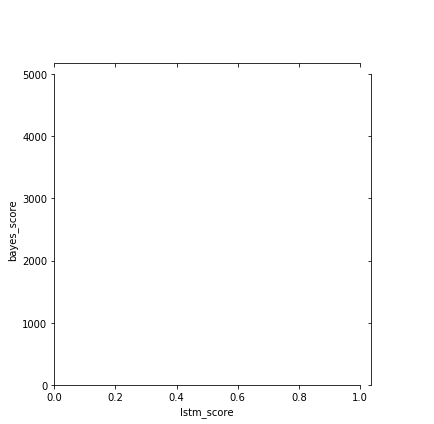

In [0]:
import matplotlib.pyplot as plt

plt.figure(figsize=(13,13))
sns.JointGrid('lstm_score', 'bayes_score', data = df)
plt.ylim([0,5000])

In [0]:
import seaborn as sns
import tensorflow as tf

In [0]:
# lstm은 틀렸는데 bayes는 맞춘거
df[(df['lstm_eval'] == 0) & (df['bayes_eval'] != 0)].shape[0]

2107

In [0]:
df[(df['lstm_eval'] != 0) & (df['bayes_eval'] == 0)].shape[0]

2267

# 시각화

In [0]:
# LSTM 정확도
(np.sum(df['label'] == df['lstm']) / df.shape[0])*100

84.51507090425426

In [0]:
# Bayes 정확도
(np.sum(df['label'] == df['bayes']) / df.shape[0])*100

84.19505170310218